Import package + model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cobra
from cobra.io import read_sbml_model, write_sbml_model
from cobra.flux_analysis import flux_variability_analysis
from tqdm import tqdm

In [2]:
M_xanthus = read_sbml_model(
    "../M_xanthus_model.sbml"
)  # import the Myxococcus xanthus model
M_xanthus

Name,myxo_model
Memory address,761842336cf0
Number of metabolites,1280
Number of reactions,1367
Number of genes,1192
Number of groups,0
Objective expression,1.0*OF_BIOMASS - 1.0*OF_BIOMASS_reverse_80d2e
Compartments,"c, e"


In [3]:
E_coli = read_sbml_model("../E_coli_model.sbml")
E_coli

Name,iML1515
Memory address,7618411eead0
Number of metabolites,1877
Number of reactions,2714
Number of genes,1516
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685
Compartments,"cytosol, extracellular space, periplasm"


**Adding Reactions**

In [4]:
Biomass_e = cobra.Metabolite(
    "Biomass_e", formula="BIOMASS", name="Biomass [e]", compartment="e"
)

M_xanthus.add_metabolites(Biomass_e)  # add M_xanthus.metabolites.Biomass_e

M_xanthus.add_boundary(
    M_xanthus.metabolites.get_by_id("Biomass_e"), type="exchange"
)  # add the exchange reaction for Biomass_e

Reaction identifier,EX_Biomass_e
Name,Biomass [e] exchange
Memory address,0x76183f8178b0
Stoichiometry,Biomass_e <=> Biomass [e] <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [5]:
Mreaction = cobra.Reaction("PR_BIOMASS")
Mreaction.name = "Predation Biomass"
Mreaction.subsystem = ""
Mreaction.lower_bound = 0.0  # This is the default
Mreaction.upper_bound = 1000.0  # This is the default

Biomass_e = M_xanthus.metabolites.Biomass_e

spmd_e = (
    M_xanthus.metabolites.spmd_e
)  # carbon source from exchange used in biomass reaction
pheme_e = M_xanthus.metabolites.pheme_e
val_L_e = M_xanthus.metabolites.val_L_e  # imported AA
ile_L_e = M_xanthus.metabolites.ile_L_e
leu_L_e = M_xanthus.metabolites.leu_L_e
lys_L_e = M_xanthus.metabolites.lys_L_e
his_L_e = M_xanthus.metabolites.his_L_e
gly_cys_L_e = M_xanthus.metabolites.gly_cys_L_e
cgly_e = M_xanthus.metabolites.cgly_e
pro_L_e = M_xanthus.metabolites.pro_L_e
alaala_e = M_xanthus.metabolites.alaala_e
glu_L_c = M_xanthus.metabolites.glu_L_c
met_L_e = M_xanthus.metabolites.met_L_e
thr_L_e = M_xanthus.metabolites.thr_L_e
fru_e = M_xanthus.metabolites.fru_e  # import fructose
malt_e = M_xanthus.metabolites.malt_e
acald_e = M_xanthus.metabolites.acald_e  # import FA?
acac_e = M_xanthus.metabolites.acac_e
glyc3p_e = M_xanthus.metabolites.glyc3p_e
gam_e = M_xanthus.metabolites.gam_e  # from here don't know
fum_e = M_xanthus.metabolites.fum_e
orn_e = M_xanthus.metabolites.orn_e
succ_e = M_xanthus.metabolites.succ_e

Mreaction.add_metabolites(
    {
        Biomass_e: -1,
        spmd_e: 1,
        pheme_e: 1,
        val_L_e: 1,
        ile_L_e: 1,
        leu_L_e: 1,
        lys_L_e: 1,
        his_L_e: 1,
        gly_cys_L_e: 1,
        cgly_e: 1,
        pro_L_e: 1,
        alaala_e: 1,
        fru_e: 1,
        malt_e: 1,
        glu_L_c: 1,
        met_L_e: 1,
        thr_L_e: 1,
        gam_e: 1,
        fum_e: 1,
        orn_e: 1,
        succ_e: 1,
        acald_e: 1,
        acac_e: 1,
        glyc3p_e: 1,
    }
)  # add the metabolites to the reaction

Mreaction.gene_reaction_rule = ""  # define which gene allow the reaction

M_xanthus.add_reactions([Mreaction])  # add the PR_Biomass reaction

M_xanthus.reactions.PR_BIOMASS

Reaction identifier,PR_BIOMASS
Name,Predation Biomass
Memory address,0x7618cc38b280
Stoichiometry,Biomass_e --> acac_e + acald_e + alaala_e + cgly_e + fru_e + fum_e + gam_e + glu_L_c + gly_cys_L_e + glyc3p_e + his_L_e + ile_L_e + leu_L_e + lys_L_e + malt_e + met_L_e + orn_e + pheme_e + pro_L_e... Biomass [e] --> Acetoacetate [e] + Acetaldehyde [e] + Ala-Ala [e] + Cys-Gly [e] + D-Fructose [e] + Fumarate [e] + GLUM [e] + L-Glutamate [c] + Gly-Cys [e] + Glycerol-3-phosphate [e] + L-Histidine...
GPR,
Lower bound,0.0
Upper bound,1000.0


Change value

In [6]:
M_xanthus.reactions.EX_spmd_e.lower_bound = (
    0  # define the bound to 0 for metabolites in the reactions
)
M_xanthus.reactions.EX_pheme_e.lower_bound = 0
M_xanthus.reactions.EX_val_L_e.lower_bound = 0
M_xanthus.reactions.EX_ile_L_e.lower_bound = 0
M_xanthus.reactions.EX_leu_L_e.lower_bound = 0
M_xanthus.reactions.EX_lys_L_e.lower_bound = 0
M_xanthus.reactions.EX_gly_cys_L_e.lower_bound = 0
M_xanthus.reactions.EX_cgly_e.lower_bound = 0
M_xanthus.reactions.EX_pro_L_e.lower_bound = 0
M_xanthus.reactions.EX_alaala_e.lower_bound = 0
M_xanthus.reactions.EX_glu_L_e.lower_bound = 0
M_xanthus.reactions.EX_met_L_e.lower_bound = 0
M_xanthus.reactions.EX_thr_L_e.lower_bound = 0
M_xanthus.reactions.EX_fru_e.lower_bound = 0
M_xanthus.reactions.EX_malt_e.lower_bound = 0
M_xanthus.reactions.EX_acald_e.lower_bound = 0
M_xanthus.reactions.EX_acac_e.lower_bound = 0
M_xanthus.reactions.EX_glyc3p_e.lower_bound = 0
M_xanthus.reactions.EX_gam_e.lower_bound = 0  # tested / not sure
M_xanthus.reactions.EX_fum_e.lower_bound = 0
M_xanthus.reactions.EX_orn_e.lower_bound = 0
M_xanthus.reactions.EX_succ_e.lower_bound = 0

In [7]:
M_xanthus.reactions.EX_glc_D_e.id = (
    "EX_glc__D_e"  # change the name to correspond to E_coli
)

**Dynamic environment**

In [ ]:
# TODO make it more general (usable)
t = 0
tf = 50
steps = 0.5
time_point = [0]
it = 1
y = [100, 100]  # give the quantity of metabolites in the environment
biomass = 0  # quantity of Biomass in the environment
fluxes_E = []
fluxes_M = []
Biomass_E = [0]
Biomass_M = [0]

reactions_list_E_coli = []  # get all reaction of E_coli model
for reaction in E_coli.reactions:
    reactions_list_E_coli.append(reaction.id)

reactions_list_M_xanthus = []
for reaction in M_xanthus.reactions:
    reactions_list_M_xanthus.append(reaction.id)


def add_dynamic_bounds(model, y, biomass):
    """Use external concentrations to change the bound changing the uptake flux of the limited metabolites. \n
    :param sbml model: The model you want to add dynamic bounds. \n
    :param list(int) y: A list of the metabolite quantities in environment. In order: glucose, amonium. \n
    :param int biomass: Quantities of Biomass in the environment.
    """
    glucose, ammonium = y  # expand the boundary species (Can put more)

    glucose_max_import = (
        -10 * glucose / (5 + glucose)
    )  # calculate the max import value for the metabolites
    ammonium_max_import = -10 * ammonium / (5 + ammonium)
    biomass_max_import = -10 * biomass / (5 + biomass)

    model.reactions.EX_nh4_e.lower_bound = (
        ammonium_max_import  # change the limit of importation with the max import
    )

    E_coli.reactions.EX_glc__D_e.lower_bound = glucose_max_import

    M_xanthus.reactions.EX_glc__D_e.bounds = [0, 0]
    M_xanthus.reactions.EX_Biomass_e.lower_bound = biomass_max_import


def update_metabolites(fluxes, y, biomass):
    """Updtate the metabolites quantities depending of the fluxes. \n
    :param list(int) fluxes: The list of the fluxes. \n
    :param list(int) y: A list of the metabolite quantities in environment. In order: glucose, amonium, isoleucine. \n
    :param int biomass: Quantities of Biomass in the environment.
    """
    glucose, ammonium = y  # expand the boundary species (Can put more)

    glucose = glucose + fluxes["EX_glc__D_e"]  # calculate the number of metabolites
    ammonium = ammonium + fluxes["EX_nh4_e"]
    if "BIOMASS_Ec_iML1515_core_75p37M" in fluxes:
        biomass = biomass + fluxes["BIOMASS_Ec_iML1515_core_75p37M"]
    if "EX_Biomass_e" in fluxes:
        biomass = biomass + fluxes["EX_Biomass_e"]

    if glucose < 0:
        glucose = 0  # if the value goes below zero set the number of metaboltie to zero
    if ammonium < 0:
        ammonium = 0
    if biomass < 0:
        biomass = 0

    y = (glucose, ammonium)  # changing the value of the metabolites
    return y, biomass


with tqdm(total=tf) as pbar:
    while t < tf:
        add_dynamic_bounds(E_coli, y, biomass)  ## For Escherichia coli
        FBA_1 = E_coli.optimize()  # perform flux balance analysis (FBA)
        fluxes_E_coli = FBA_1.fluxes.get(
            reactions_list_E_coli
        )  # store the fluxes of the FBA
        fluxes_E_coli *= 0.1  # multiply by Biomass Concentration to get flux
        fluxes_E.append(fluxes_E_coli)  # store all the fluxes
        y, biomass = update_metabolites(fluxes_E_coli, y, biomass)
        Biomass_E.append(biomass)

        add_dynamic_bounds(M_xanthus, y, biomass)  ## For Myxococcus xanthus
        FBA_2 = M_xanthus.optimize()
        fluxes_M_xanthus = FBA_2.fluxes.get(reactions_list_M_xanthus)
        fluxes_M_xanthus *= 0.1
        fluxes_M.append(fluxes_M_xanthus)
        y, biomass = update_metabolites(fluxes_M_xanthus, y, biomass)
        Biomass_M.append(Biomass_M[it - 1] + fluxes_M_xanthus["OF_BIOMASS"])

        time_point.append(time_point[it - 1] + steps)
        it += 1
        t += steps
        pbar.update(steps)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50.0/50 [00:15<00:00,  3.14it/s]


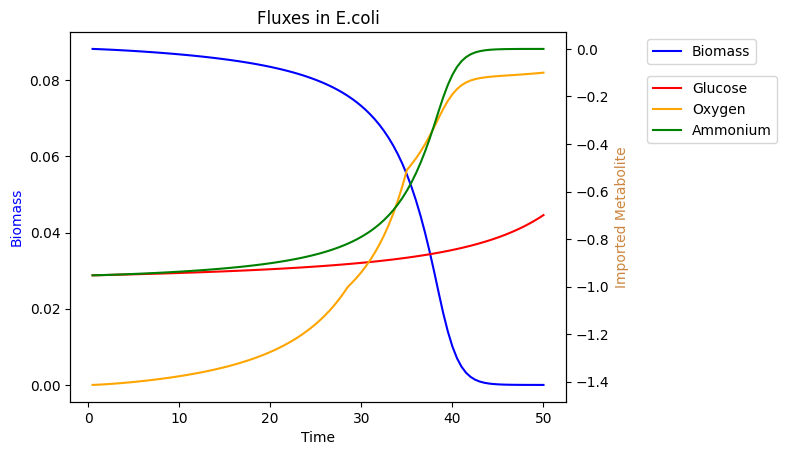

In [9]:
glucose = []
oxygen = []
ammonium = []
biomass = []

for i in fluxes_E:
    glucose.append(i["EX_glc__D_e"])
    biomass.append(i["BIOMASS_Ec_iML1515_core_75p37M"])
    oxygen.append(i["EX_o2_e"])
    ammonium.append(i["EX_nh4_e"])

ax = plt.subplot(111)
ax.plot(time_point[1:], biomass, color="blue", label="Biomass")
ax2 = plt.twinx(ax)
ax2.plot(time_point[1:], glucose, color="red", label="Glucose")
ax2.plot(time_point[1:], oxygen, color="orange", label="Oxygen")
ax2.plot(time_point[1:], ammonium, color="green", label="Ammonium")
ax.set_ylabel("Biomass", color="blue")
ax2.set_ylabel("Imported Metabolite", color="peru")
ax.set_xlabel("Time")

ax.set_title("Fluxes in E.coli")
ax.legend(bbox_to_anchor=(1.15, 1), loc="upper left")
ax2.legend(bbox_to_anchor=(1.15, 0.90), loc="upper left")

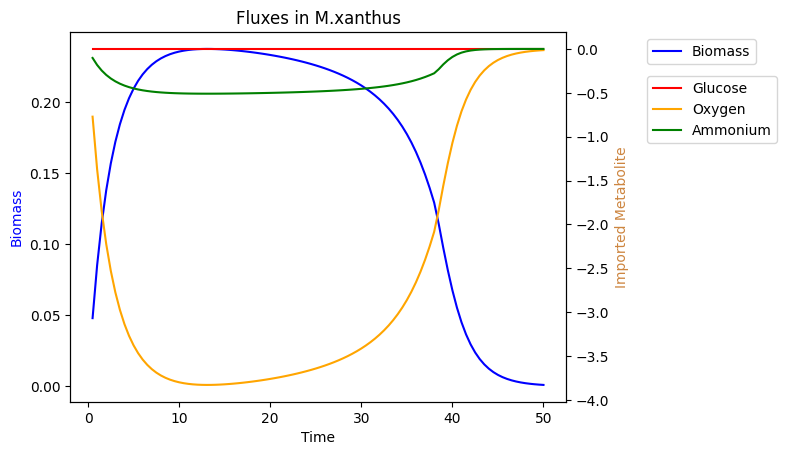

In [10]:
glucose = []
oxygen = []
ammonium = []
biomass = []

for i in fluxes_M:
    glucose.append(i["EX_glc__D_e"])
    biomass.append(i["OF_BIOMASS"])
    oxygen.append(i["EX_o2_e"])
    ammonium.append(i["EX_nh4_e"])

ax = plt.subplot(111)
ax.plot(time_point[1:], biomass, color="blue", label="Biomass")
ax2 = plt.twinx(ax)
ax2.plot(time_point[1:], glucose, color="red", label="Glucose")
ax2.plot(time_point[1:], oxygen, color="orange", label="Oxygen")
ax2.plot(time_point[1:], ammonium, color="green", label="Ammonium")

ax.set_ylabel("Biomass", color="blue")
ax2.set_ylabel("Imported Metabolite", color="peru")
ax.set_xlabel("Time")

ax.set_title("Fluxes in M.xanthus")
ax.legend(bbox_to_anchor=(1.15, 1), loc="upper left")
ax2.legend(bbox_to_anchor=(1.15, 0.90), loc="upper left")

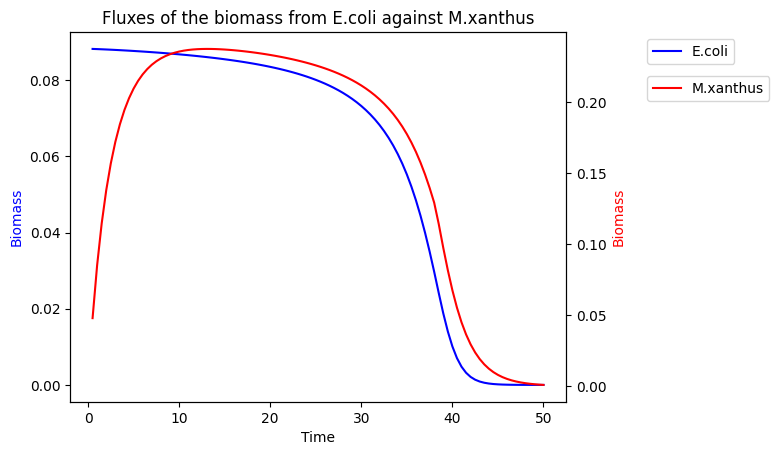

In [11]:
biomass_E = []
biomass_M = []

for i in fluxes_M:
    biomass_M.append(i["OF_BIOMASS"])  # taking the biomass flux
for j in fluxes_E:
    biomass_E.append(j["BIOMASS_Ec_iML1515_core_75p37M"])


ax = plt.subplot(111)
ax.plot(
    time_point[1:], biomass_E, color="blue", label="E.coli"
)  # plot the biomass flux of E_coli
ax2 = plt.twinx(ax)
ax2.plot(time_point[1:], biomass_M, color="red", label="M.xanthus")

ax.set_ylabel("Biomass", color="blue")  # set the name
ax2.set_ylabel("Biomass", color="red")
ax.set_xlabel("Time")

ax.set_title("Fluxes of the biomass from E.coli against M.xanthus")  # set the title
ax.legend(bbox_to_anchor=(1.15, 1), loc="upper left")  # show the legend
ax2.legend(bbox_to_anchor=(1.15, 0.90), loc="upper left")

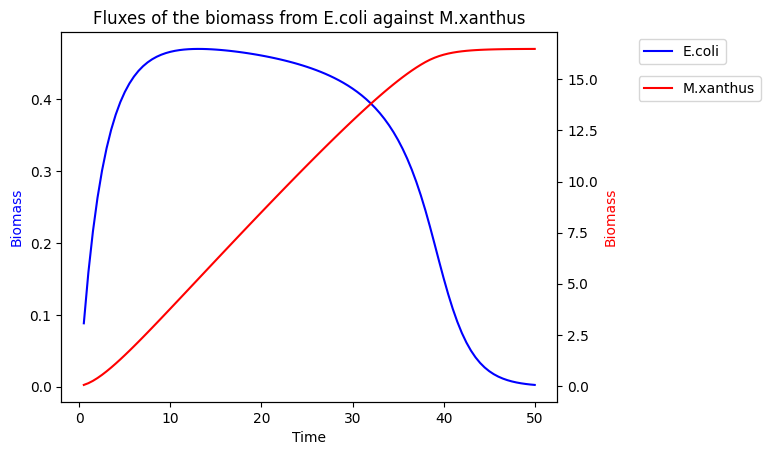

In [12]:
ax = plt.subplot(111)
ax.plot(
    time_point[1:], Biomass_E[1:], color="blue", label="E.coli"
)  # plot the biomass flux of E_coli
ax2 = plt.twinx(ax)
ax2.plot(time_point[1:], Biomass_M[1:], color="red", label="M.xanthus")

ax.set_ylabel("Biomass", color="blue")  # set the name
ax2.set_ylabel("Biomass", color="red")
ax.set_xlabel("Time")

ax.set_title("Fluxes of the biomass from E.coli against M.xanthus")  # set the title
ax.legend(bbox_to_anchor=(1.15, 1), loc="upper left")  # show the legend
ax2.legend(bbox_to_anchor=(1.15, 0.90), loc="upper left")